In [9]:
%matplotlib inline
import talib as ta
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [61]:
class TALibMomentumStudies:
    
    def RSI(self, close, period, feature_dict):
        feature_dict['RSI_'+str(period)]='Keep'
        relSI = ta.RSI(
            close,
            # default is 30
            period)
        return relSI, feature_dict

    def PPO(self, close, fastperiod, slowperiod, feature_dict):
        feature_dict['PPO_f'+str(fastperiod)+'_s'+str(slowperiod)]='Keep'
        pricePercOsc = ta.PPO(
            close,
            # defaults are 0
            # The FastLimit and SlowLimit parameters should be between 0.01 and 0.99
            fastperiod,
            slowperiod)
        return pricePercOsc, feature_dict
    
    def CMO(self, close, period, feature_dict):
        feature_dict['CMO_'+str(period)]='Keep'
        chandeMO = ta.CMO(
            close,
            # default is 30
            period)
        return chandeMO, feature_dict
    
    def CCI(self, high, low, close, feature_dict):
        feature_dict['CCI']='Keep'
        commChanIndex = ta.CCI(
            high,
            low,
            close)
        return commChanIndex, feature_dict
    
    def UltOsc(self, high, low, close, t1, t2, t3, feature_dict):
        feature_dict['UltOsc_t1'+str(t1)+'_t2'+str(t2)+'_t3'+str(t3)]='Keep'
        ultOsc = ta.ULTOSC(
            high,
            low,
            close,
            t1,
            t2,
            t3)
        return ultOsc, feature_dict

In [62]:
import sys
sys.path.append('./lib')
sys.path.append('./utilities')
from plot_utils import *
from retrieve_data import *
dataLoadStartDate = "2014-04-01"
dataLoadEndDate = "2018-04-01"
issue = "TLT"
feature_dict = {}

taLibMomSt = TALibMomentumStudies()
    
dSet = DataRetrieve()
dataSet = dSet.read_issue_data(issue)
    
dataSet = dSet.set_date_range(dataSet, dataLoadStartDate,dataLoadEndDate)

Successfully retrieved data series for TLT


In [64]:
dataSet['RSI_20'], feature_dict = taLibMomSt.RSI(dataSet.Pri.values, 20, feature_dict)
dataSet['PPO'], feature_dict = taLibMomSt.PPO(dataSet.Pri.values, 10, 24, feature_dict)
dataSet['CMO_20'], feature_dict = taLibMomSt.CMO(dataSet.Pri.values, 20, feature_dict)
dataSet['CCI'], feature_dict = taLibMomSt.CCI(dataSet.High.values, dataSet.Low.values, dataSet.Pri.values, feature_dict)
dataSet['ULTOSC'], feature_dict = taLibMomSt.UltOsc(dataSet.High.values, dataSet.Low.values, dataSet.Pri.values, 7, 24, 28, feature_dict)

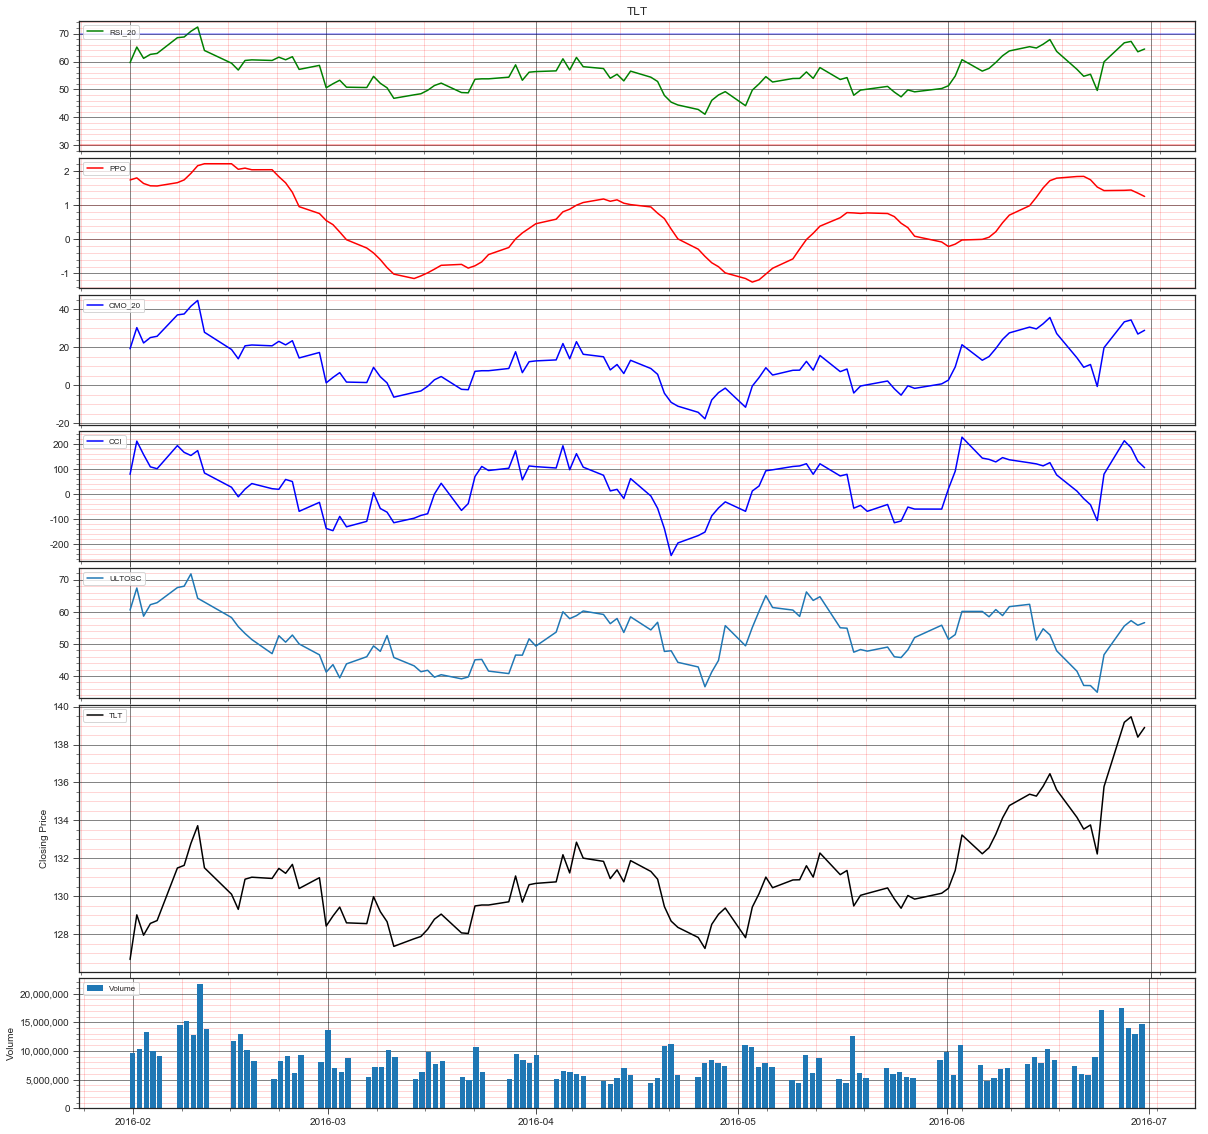

In [66]:
startDate = "2016-02-01"
endDate = "2016-06-30"
rsiDataSet = dataSet.ix[startDate:endDate]
plt.figure(figsize=(20,20))
horizplots = 8
top = plt.subplot2grid((horizplots,4), (0, 0), rowspan=1, colspan=4)
top2 = plt.subplot2grid((horizplots,4), (1, 0), rowspan=1, colspan=4)
top3 = plt.subplot2grid((horizplots,4), (2, 0), rowspan=1, colspan=4)
top4 = plt.subplot2grid((horizplots,4), (3, 0), rowspan=1, colspan=4)
top5 = plt.subplot2grid((horizplots,4), (4, 0), rowspan=1, colspan=4)
middle = plt.subplot2grid((horizplots,4), (5, 0), rowspan=2, colspan=4)
bottom = plt.subplot2grid((horizplots,4), (7, 0), rowspan=1, colspan=4)
#top.plot(rsiDataSet.index, rsiDataSet['Pri']) #
#bottom.bar(rsiDataSet.index, rsiDataSet['Volume'])
top.plot(rsiDataSet.index, rsiDataSet['RSI_20'], 'g-')
top2.plot(rsiDataSet.index, rsiDataSet['PPO'], 'r-')
top3.plot(rsiDataSet.index, rsiDataSet['CMO_20'], 'b-')
top4.plot(rsiDataSet.index, rsiDataSet['CCI'], 'b-')
top5.plot(rsiDataSet.index, rsiDataSet['ULTOSC'], '-')
middle.plot(rsiDataSet.index, rsiDataSet['Pri'], 'k-', markersize=3,label=issue)
bottom.bar(rsiDataSet.index, rsiDataSet['Volume'], label='Volume');
plt.subplots_adjust(hspace=0.05)
# set the labels
top.axes.get_xaxis().set_visible(True)
top.set_title('TLT')
middle.set_ylabel('Closing Price')
bottom.set_ylabel('Volume')

top.axhline(y=30, color='red', linestyle='-', alpha=0.4)
top.axhline(y=70, color='blue', linestyle='-', alpha=0.4)

for ax in top, top2, top3, top4, top5, middle, bottom:
                ax.label_outer()
                ax.legend(loc='upper left', frameon=True, fontsize=8)
                ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
                ax.grid(True, which='both')
                ax.xaxis_date()
                ax.autoscale_view()
                ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.6)
                ax.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.2)
                ax.minorticks_on()

In [51]:
print(feature_dict)

{'RSI_20': 'Keep', 'PPO_f10_s24': 'Keep', 'CMO_20': 'Keep'}
